Student Pass/Fail Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\Users\dhruv\Internship\Task_5\main_dataset\student_performance.csv"
data = pd.read_csv(file_path)
data

,Study Hours,Attendance,Pass
0,24.97,64.87,1
1,18.62,72.83,1
2,26.48,63.11,1
3,35.23,70.38,1
4,17.66,46.60,0
...,...,...,...
1995,30.70,75.43,1
1996,19.73,43.83,0
1997,11.18,70.20,0
1998,18.37,99.65,1


In [4]:
data.isnull().sum()

Study Hours    0
Attendance     0
Pass           0
dtype: int64

In [5]:
data.describe()

,Study Hours,Attendance,Pass
count,2000.000000,2000.000000,2000.000000
mean,20.428430,74.608905,0.585500
std,9.484526,14.456511,0.492759
min,0.000000,30.000000,0.000000
25%,13.770000,64.360000,0.000000
50%,20.450000,75.000000,1.000000
75%,26.830000,84.982500,1.000000
max,40.000000,100.000000,1.000000


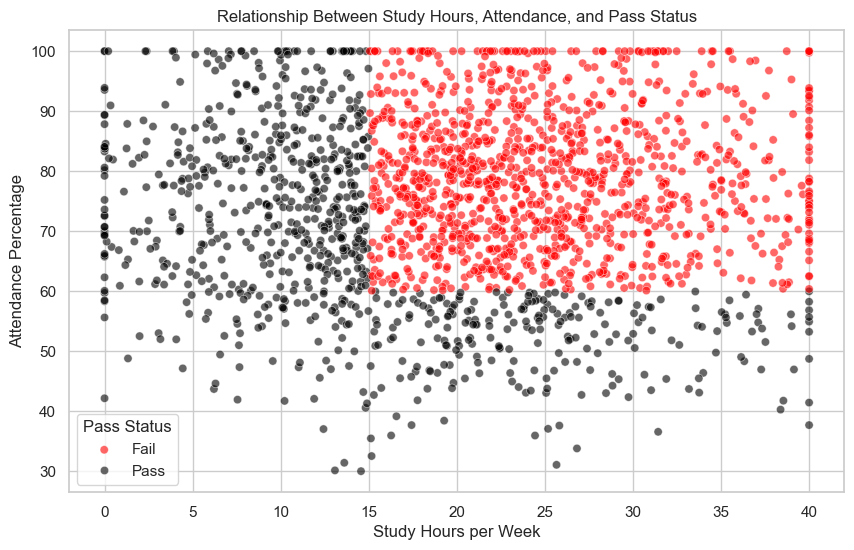

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["Study Hours"],
    y=data["Attendance"],
    hue=data["Pass"],
    palette={0: "black", 1: "red"},
    alpha=0.6
)

plt.xlabel("Study Hours per Week")
plt.ylabel("Attendance Percentage")
plt.title("Relationship Between Study Hours, Attendance, and Pass Status")
plt.legend(title="Pass Status", labels=["Fail", "Pass"])

plt.show()


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[["Study Hours", "Attendance"]]
y = data["Pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [70]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"The Classification Report: {classification_rep}")

Accuracy: 0.8675
The Classification Report:               precision    recall  f1-score   support

           0       0.83      0.85      0.84       166
           1       0.89      0.88      0.89       234

    accuracy                           0.87       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400



In [71]:
from sklearn.metrics import confusion_matrix

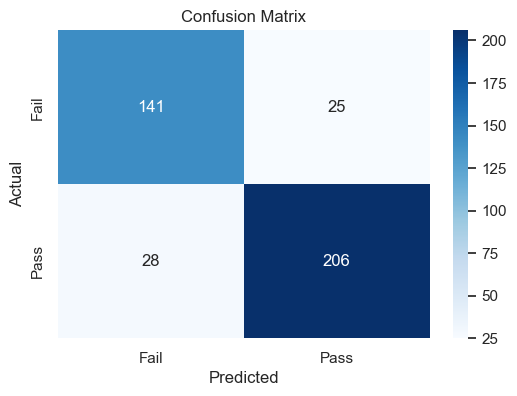

In [72]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Sentiment Analysis

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
file_path = r"C:\Users\dhruv\Internship\Task_5\main_dataset\reviews_dataset\resturant_reviews.csv"
data = pd.read_csv(file_path)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [75]:
data.rename(columns={"Liked": "Sentiment"}, inplace=True)
data

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [76]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [77]:
print(data.columns)

Index([' Review', 'Sentiment'], dtype='object')


In [78]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [79]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  
    tokens = word_tokenize(text) 
    tokens = [t for t in tokens if t not in stop_words]  
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  
    return " ".join(tokens)

data['cleaned_text'] = data[' Review'].apply(preprocess)


print(data[[' Review', 'cleaned_text']].head())

                                              Review  \
0                           Wow... Loved this place.   
1                                 Crust is not good.   
2          Not tasty and the texture was just nasty.   
3  Stopped by during the late May bank holiday of...   
4  The selection on the menu was great and so wer...   

                                        cleaned_text  
0                                    wow loved place  
1                                         crust good  
2                                tasty texture nasty  
3  stopped late may bank holiday rick steve recom...  
4                         selection menu great price  


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

y = data['Sentiment']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=36)

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.84

 Classification Report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86       106
           1       0.87      0.78      0.82        94

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



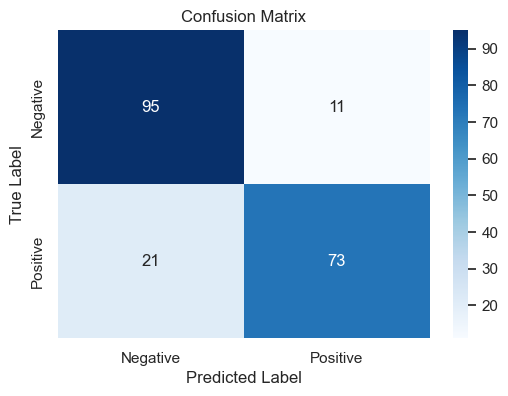

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', xticklabels=['Negative', 'Positive'], 
           yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate

In [94]:
model = LogisticRegression()

cv_scores = cross_val_score(model, X, y, cv=16, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.71428571 0.77777778 0.76190476 0.82539683 0.74603175 0.82539683
 0.74603175 0.76190476 0.79032258 0.79032258 0.83870968 0.87096774
 0.80645161 0.75806452 0.85483871 0.83870968]
Mean Accuracy: 0.794194828469022
